# scikit-learn
## Machine Learning en Python

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) es un paquete Python diseñado para dar acceso a **conocidos** algoritmos de aprendizaje automático dentro del código Python, a través de **una API limpia y bien pensada**. Ha sido construido por cientos de colaboradores de todo el mundo, y se utiliza tanto en la industria como en el mundo académico.

Scikit-Learn está construido sobre las librerías [NumPy (Numerical Python)](http://numpy.org) y [SciPy (Scientific Python)](http://scipy.org) de Python, que permiten una eficiente computación numérica y científica dentro de Python. Como tal, scikit-learn no está específicamente diseñada para conjuntos de datos extremadamente grandes, aunque hay [algunos trabajos](https://github.com/ogrisel/parallel_ml_tutorial) en esta área.

Antes de nada, vamos a importar los paquetes que necesitamos y comprobar que version tenemos instalada. En caso de que nos falte algún paquete, usamos el siguiente comando en la consola de conda:

```
conda install paquete
```

In [1]:
import numpy
import scipy
import matplotlib
import sklearn

print('numpy:', numpy.__version__)
print('scipy:', scipy.__version__)
print('matplotlib:', matplotlib.__version__)
print('scikit-learn:', sklearn.__version__)

numpy: 1.19.2
scipy: 1.5.2
matplotlib: 3.3.2
scikit-learn: 0.23.2


# Introducción

## ¿Que es el aprendizaje automático (Machine Learning)?

El **aprendizaje automático** o **Machine Learning (ML)** es una aplicación de la **inteligencia artificial (IA)** que proporciona a los sistemas la capacidad de aprender y mejorar automáticamente a partir de la experiencia sin ser programados explícitamente. El aprendizaje automático se centra en el desarrollo de programas informáticos que pueden acceder a los datos y utilizarlos para **aprender por sí mismos**.

El proceso de aprendizaje comienza con **observaciones o datos**, como ejemplos, experiencia directa o instrucción, para buscar patrones en los datos y tomar mejores decisiones en el futuro en base a los ejemplos que proporcionamos. El objetivo principal es permitir que las computadoras aprendan automáticamente sin intervención o asistencia humana y ajustar las acciones en consecuencia.

Vamos a introducir dos tareas de aprendizaje automático básicos. La primera es la tarea de **clasificación**. La siguiente figura nos muestra una colección de datos bi-dimensional, donde cada punto esta coloreado en acorde a la clase a la que pertenece. Un algoritmo de clasificación nos dará un criterio para separar los conjuntos de datos pertenecientes a las diferentes clases.

In [2]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

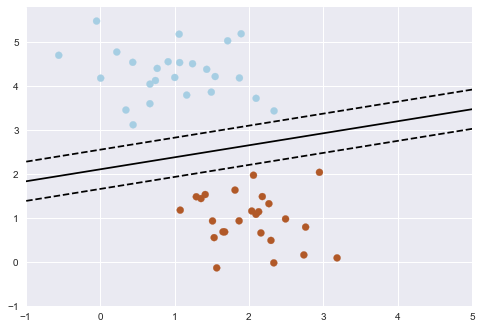

In [3]:
from fig_code import plot_sgd_separator
plot_sgd_separator()

En este ejemplo la tarea es muy simple, pero es un ejemplo simple de un concepto muy importante. Al dibujar la linea que separa los puntos hemos aprendido un modelo que podemos usarlo para clasificar datos nuevos nunca vistos hasta ahora. Si le damos un nuevo punto no etiquetado a nuestro modelo, este intentará **predecir** a que categoría pertenece.

La segunda tarea de aprendizaje automático que vamos a estudiar es la regresión: 

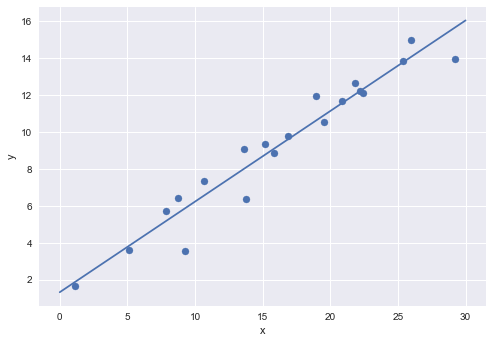

In [4]:
from fig_code import plot_linear_regression
plot_linear_regression()

De nuevo, tenemos un ejemplo en el que el objetivo es ajustar un modelo a los datos de entrenamiento, de tal manera que el modelo pueda generalizar como es debido. En el caso de este ejemplo de regresión, la entrada que le pasamos al modelo es un valor-x y él nos devuelve el valor-y predecido. Este ejemplo es un caso sencillo de una tarea de aprendizaje automático fundamental.

## Representación de los datos en Scikit-learn

El aprendizaje automático trata de crear modelos a partir de datos. Por ese motivo, vamos a empezar por como se tienen que representar los datos para que el ordenador los pueda procesar. 

La mayoría de algoritmos de machine learning implementados en scikit-learn esperan que los datos esten guardados en **arrays bidimensionales o matrices**. Normalmente, el tamaño de los arrays suele ser `[n_samples, n_features]`.

- **n_samples:**   El número de instancias para procesar (por ejemplo, clasificar). Una instancia puede ser un documento, una imágen, un sonido, un video, una fila en una base de datos o ficher CSV, o cualquier otra cosa con un número fijo de características cuantitativas.
- **n_features:**  El número de características que se pueden usar para describir cada instancia de una manera cuantitativa. Las _features_ sueles ser generalmente valores reales, pero también pueden ser booleanos o valores discretos en algunos casos.



![Data Layout](images/data-layout.png)

(Figure from the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))

## Un ejemplo sencillo: el dataset Iris

Vamos a ver un ejemplo de un dataset sencillo. El dataset iris, que viene gardado por defecto en la librería de scikit-learn junto con otros dataset, consiste una base de datos con medidas de tres especies diferentes de lirios. 

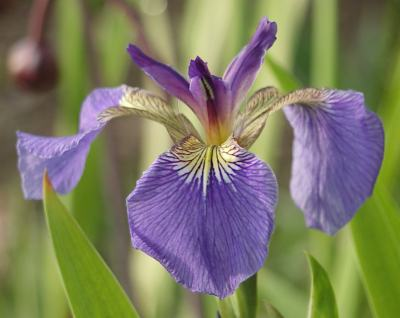

Iris Setosa



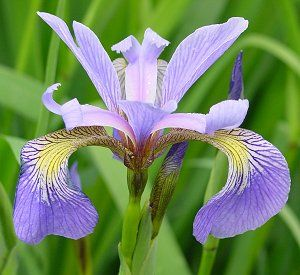

Iris Versicolor



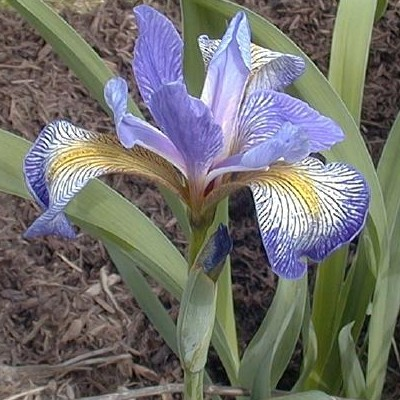

Iris Virginica


In [5]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

El Iris dataset está formado de la siguiente manera:

- Features:
    1. longitud del sépalo en cm
    2. ancho del sépalo en cm
    3. longitud del pétalo en cm
    4. ancho del pétalo en cm

- Clases a predecir:
    1. Iris Setosa
    2. Iris Versicolour
    3. Iris Virginica

La librería `scikit-learn` incluye una copia en fichero CSV del dataset con una función para cargarlo como numpy arrays:

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [9]:
print(iris.target.shape)
print(iris.target)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


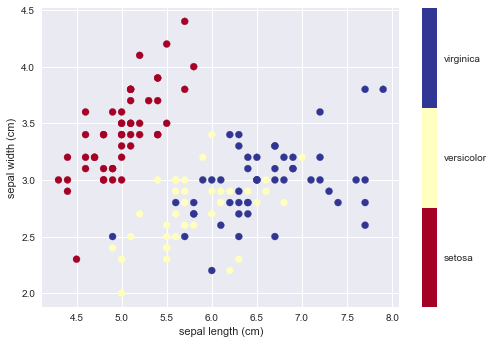

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

## El objeto Estimator de Scikit-learn

Cualquier algoritmo de scikit-learn esta basado en un objeto denominado ''Estimator'' Por ejemplo, un modelo de regresion lineal esta implementado de la siguiente manera:

In [12]:
from sklearn.linear_model import LinearRegression

**Parámetros del estimador**: Todos los parámetros de un estimador pueden especificarse cuando esté se inicia. Normalmente, los parámetros suelen venir inciados con valores por defecto más o menos adecuados.

In [13]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [14]:
print(model)

LinearRegression(normalize=True)


**Parámetros del modelo estimado**: Cuando ajustamos (_fit_) los datos con un objeto ''Estimator'', lo que estamos haciendo es estimar los parámetros del modelo desde los datos. Todos los parámetros estimados son atributos del objeto ''estimator'' que terminan con una barra baja.

In [15]:
x = np.arange(10)
y = 2 * x +1

In [16]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


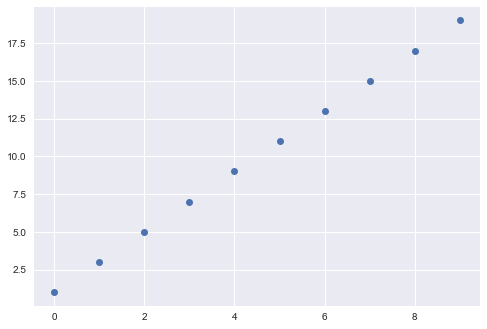

In [17]:
plt.plot(x, y, 'o');

In [18]:
# El input para sklearn es 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [19]:
model.fit(X, y)

LinearRegression(normalize=True)

In [20]:
print(model.coef_)
print(model.intercept_)

[2.]
1.0


El modelo ha encontrado una linea con pendiente 2 y ordenada al origen 1, tal y como esperabamos.